In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [2]:
df = pd.read_csv('bengaluru_house_prices.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

# Dropping the columns which are not needed

In [4]:
df1 = df.drop(['availability', 'area_type', 'society'], axis = 1)
df1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [5]:
df1.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [6]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [7]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

# Converting BHK column into integer

In [8]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head()

C:\Users\Sahil\AppData\Local\Temp\ipykernel_6476\886311430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [9]:
df2.drop('size', axis = 1, inplace = True)
df2

C:\Users\Sahil\AppData\Local\Temp\ipykernel_6476\3569747395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('size', axis = 1, inplace = True)


,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,1715,3.0,3.0,112.00,3
13315,Whitefield,3453,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689,4.0,1.0,488.00,4


# Converting total sqft range into integer

In [10]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [11]:
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True

df2[~df2['total_sqft'].apply(isFloat)]

,location,total_sqft,bath,balcony,price,bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,0.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,1200 - 1470,2.0,0.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,0.0,59.135,2


In [12]:
def convertRangeToNum(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    
    try:
        return float(x)
    except:
        return None
    
    
    
    

In [13]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convertRangeToNum)
df3

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3
13315,Whitefield,3453.0,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


# Defining new column - price per sqft

In [14]:
df4 = df3.copy()
df4['price_per_sqft'] = (df4['price']*100000)/df4['total_sqft']
df4.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


# Since there are 1254 locations we will change names of those locations whose freq < 10 to 'Others'

In [15]:
len(df4['location'].unique())

1265

In [16]:
df4['location'] = df4['location'].apply(lambda x: x.strip(' '))
location_stats = df4['location'].value_counts()
len(location_stats)

1254

In [17]:
location_less_than_10 = []
for i in range(len(location_stats)):
    if location_stats.values[i] <= 10:
        location_less_than_10.append(location_stats.index[i])
len(location_less_than_10)

1017

In [18]:
df4['location'] = df4['location'].apply(lambda x: 'other' if x in location_less_than_10 else x)
len(df4['location'].unique())

238

# We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [19]:
df5 = df4[~(df4['total_sqft']/df4['bhk'] < 300)]
df5.shape

(12055, 7)

# We should remove outliers per location for  price using mean and one standard deviation

In [20]:
df5['price_per_sqft'].describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [21]:
def removePPSOutliers(df):
    df_out = pd.DataFrame()
    
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf['price_per_sqft'])
        st = np.std(subdf['price_per_sqft'])
        
        reduced_df = subdf[(subdf['price_per_sqft'] > (m-st)) & (subdf['price_per_sqft'] <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

df6 = removePPSOutliers(df5)
df6.shape

(9848, 7)

# We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk


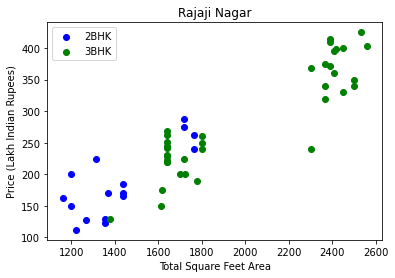

In [22]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df['location'] == location) & (df['bhk'] == 2)]
    bhk3 = df[(df['location'] == location) & (df['bhk'] == 3)]
    
    plt.scatter(bhk2['total_sqft'], bhk2['price'], color = 'blue', label = '2BHK')
    plt.scatter(bhk3['total_sqft'], bhk3['price'], color = 'green', label = '3BHK')
    
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6, 'Rajaji Nagar')

In [23]:
def removeBHKOutliers(df):
    exclude_indices = np.array([])
    
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = { 'mean' : np.mean(bhk_df['price_per_sqft']),
                              'std' : np.std(bhk_df['price_per_sqft']),
                              'count' : bhk_df.shape[0]
                
            }
            
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            
            if stats and stats['count'] > 5:
                indices = bhk_df[bhk_df['price_per_sqft'] < stats['mean']].index.values
                exclude_indices = np.append(exclude_indices, indices)
                
    return df.drop(exclude_indices, axis = 'index')

df7 = removeBHKOutliers(df6)
df7.shape

        

(7025, 7)

# It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [24]:
df7['bath'].unique()

array([ 4.,  3.,  2.,  8.,  1.,  5.,  6.,  7.,  9., 13.])

In [25]:
df8 = df7[df7['bath'] < df7['bhk'] + 2]
df8.shape

(6958, 7)

In [26]:
df8.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,11983.805668


In [27]:
df9 = df8.drop('price_per_sqft', axis = 1)
df9.head()

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


# One hot encoding for location

In [28]:
dummies = pd.get_dummies(df9['location'])
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df10 = pd.concat([df9, dummies.drop('other', axis = 1)], axis = 1)
df10.shape

(6958, 243)

In [30]:
df11 = df10.drop('location', axis = 1)
df11.shape

(6958, 242)

In [31]:
df11.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Building a model

In [32]:
X = df11.drop('price', axis = 1)
X.shape

(6958, 241)

In [33]:
Y = df11['price'].values

In [34]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.25, random_state = 10)
Xtrain.shape, Xtest.shape

((5218, 241), (1740, 241))

# Linear Regression

In [35]:
linReg = LinearRegression()
linReg.fit(Xtrain, Ytrain)


LinearRegression()

In [36]:
linReg.score(Xtest, Ytest)     #by Linear Regression accuracy is 78.45%

0.7845270259449546

In [37]:
cross_val_score(linReg, Xtrain, Ytrain, cv = 5)

array([0.82119447, 0.84513522, 0.84080789, 0.78757714, 0.8511506 ])

# Random Forest Regressor

In [38]:
rfr = RandomForestRegressor()
grid = {'n_estimators': [10, 20, 50, 100],
       'max_depth': [5, 6, 7]
       }

bestRFR = GridSearchCV(rfr, grid, cv = 5)
bestRFR.fit(Xtrain, Ytrain)
bestRFR.best_estimator_

RandomForestRegressor(max_depth=7, n_estimators=50)

In [39]:
bestRFR.score(Xtest, Ytest)      #by Random Forest Regressor, score is 76.48%

0.7546994864350666

# Gradient Boosting Regressor

In [58]:
gbr = GradientBoostingRegressor(loss = 'squared_error', learning_rate = 0.1, n_estimators = 100, criterion = 'friedman_mse')
gbr.fit(Xtrain, Ytrain)

GradientBoostingRegressor()

In [59]:
gbr.score(Xtest, Ytest)    #by Gradient Boosting Regressor, score is 78.36%

0.7835953711587537

# On comparing three models we see that Linear Regression is more effective

In [40]:
def predict_price(location,sqft,bath, balcony, bhk):    
    loc_index = np.where(X.columns==location)[0][0]    #finding the loc_index of location

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = balcony
    x[3] = bhk
    if loc_index >= 0:          
        x[loc_index] = 1                      #finding the location & making value 1
 
    return linReg.predict([x])[0] 

In [41]:
predict_price('1st Phase JP Nagar',1000, 2, 2, 2)

C:\Users\Sahil\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.33737488794834

In [42]:
import pickle

with open('real_state_price_pred_model.pickle', 'wb') as f:
    pickle.dump(linReg, f)

In [43]:
X.to_csv('Bangalore_data_preprocessed.csv', index = False)

In [56]:
import json

columns = {
    'data_columns':[col.lower() for col in X.columns]
}

with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))

In [44]:
X['total_sqft'].describe()

count     6958.000000
mean      1433.359800
std        694.622812
min        300.000000
25%       1082.000000
50%       1247.000000
75%       1629.465000
max      12000.000000
Name: total_sqft, dtype: float64

In [45]:
X['bath'].unique()

array([ 4.,  3.,  2.,  1.,  5.,  6.,  8.,  7.,  9., 13.])

In [46]:
X['balcony'].unique()

array([1., 2., 3., 0.])

In [47]:
X['bhk'].unique()

array([ 4,  3,  2,  1,  5,  6,  8,  7,  9, 11, 13], dtype=int64)